In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation,LeakyReLU, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


C:\Users\Javad\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
######## 1- Simulated Time Series
np.random.seed(20181107)
y0 = 3 * np.random.normal(0,1)
y1 = -5 * np.random.normal(0,1)
y2 = 4 * np.random.normal(0,1)
y3 = 2 * np.random.normal(0,1)
y4 = -2 * np.random.normal(0,1)
Y_raw_1 = [y0, y1, y2, y3, y4]
T = 1000
a1 = .2
a2 = 0.3
a3 = -0.4
a4 = 0.1
a5 = 0.8
for t in range(T):
    yt_5 = Y_raw_1[-5]
    yt_4 = Y_raw_1[-4]
    yt_3 = Y_raw_1[-3]
    yt_2 = Y_raw_1[-2]
    yt_1 = Y_raw_1[-1]
    e = np.random.normal(0,1) 
    yt = a1 * yt_1 + a2 * yt_2 + a3 * yt_3 + a4 * yt_4 + a5 * yt_5 + e 
    Y_raw_1.append(yt)
Y_raw_1 = np.array(Y_raw_1[5:])
Y_raw_1 = Y_raw_1.reshape(T, 1)

Y_raw_2 = np.array([3 * np.sin(t/20) + np.random.normal(0,1) for t in range(T)])
Y_raw_2 = Y_raw_2.reshape(T, 1)

Y_raw_3 = np.array([t/5*np.sin(t/20) + np.random.normal(0,np.sqrt(t)) for t in range(T)])
Y_raw_3 = Y_raw_3.reshape(T, 1)

data = np.stack((Y_raw_1, Y_raw_2, Y_raw_3), axis=1)
data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
data = pd.DataFrame(data, columns=['Y1', 'Y2', 'Y3'])
pd.DataFrame.to_csv(data, 'Simulated_Data.csv')

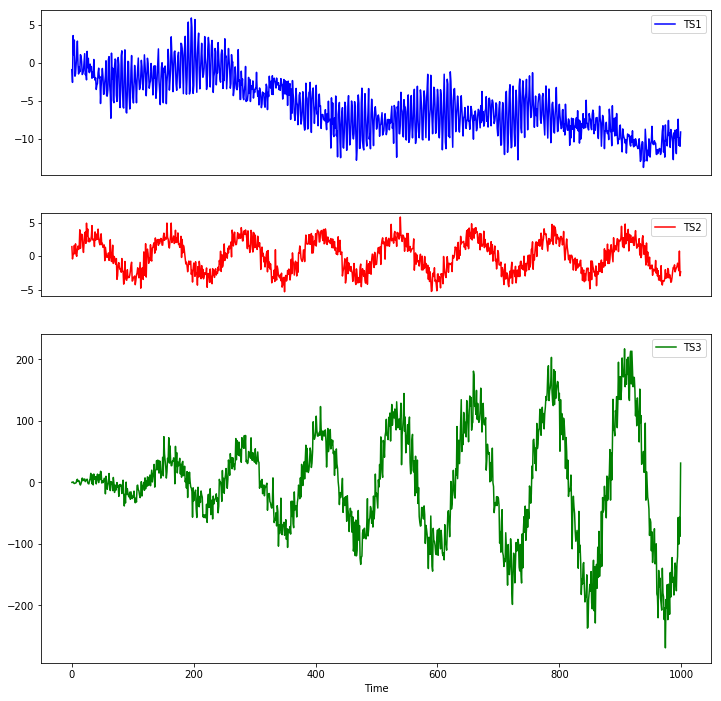

In [54]:
# plot it
f, (a0, a1, a2) = plt.subplots(3,1, gridspec_kw = {'height_ratios':[2, 1,4]}, figsize=(12, 12))
a0.plot(data.iloc[:,0], 'b')
a0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a0.legend(['TS1'])

a1.plot(data.iloc[:,1], 'r')
a1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a1.legend(['TS2'])

a2.plot(data.iloc[:,2], 'g')
a2.legend(['TS3'])
a2.set_xlabel('Time');
plt.savefig(r'C:\Users\Javad\Dropbox\McGill ECON MA and PhD\2018\9- Fall 2018\1- ECON 706- Machine Learning\Project\Pics\TS_sim')



In [81]:
# Summary stat
Sum_St = []
for i in range(data.shape[1]):
    avg = float("%0.2f"%np.mean(data.iloc[:, i]))
    std = float("%0.2f"%np.std(data.iloc[:, i]))
    AC1 = float("%0.2f"%pd.Series.autocorr(data.iloc[:, i]))
    AC2 = float("%0.2f"%pd.Series.autocorr(data.iloc[:, i], lag=2))
    Sum_St.append(data.columns[i] + ' & ' + str(avg) + ' & ' + str(std) + ' & ' + str(AC1) + ' & ' + str(AC2))
Var = []
for i in range(data.shape[1]):
    row = []
    for j in range(data.shape[1]):
        x = data.iloc[:, i]
        y = data.iloc[:, j]
        np.corrcoef(x,y)
        row.append(np.corrcoef(x,y)[0,1])
    Var.append(row)
print(Sum_St,'\n')
print(Var)


['Y1 & -5.53 & 3.75 & 0.8 & 0.61', 'Y2 & 0.0 & 2.36 & 0.82 & 0.82', 'Y3 & -3.62 & 85.82 & 0.93 & 0.93'] 

[[1.0, 0.02326841446138847, 0.042380389005493194], [0.023268414461388467, 0.9999999999999998, 0.7481551214662499], [0.042380389005493194, 0.7481551214662499, 1.0]]


In [10]:
####### 2- Beijing PM2.5 Data Data Set 
# hourly data
dataset_h = pd.read_csv(r'C:\Users\Javad\Desktop\ML-CNN-Example\PRSA_data_2010.1.1-2014.12.31.csv')
date = pd.to_datetime(dataset_h[['year', 'month', 'day', 'hour']])
dataset_h['date'] = date
dataset_h.index = dataset_h['date']
dataset_h = dataset_h.drop(['No', 'year', 'month', 'day', 'hour', 'date', 'cbwd'], axis = 1)
dataset_h = dataset_h.dropna(axis=0)
pd.DataFrame.to_csv(dataset_h, 'Beijing_hourly.csv')

# daily resampled data
dataset_d = dataset_h.resample('D')
dataset = dataset_d.last()
pd.DataFrame.to_csv(dataset_d, 'Beijing_daily.csv')


C:\Users\Javad\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1569: FutureWarning: 
.resample() is now a deferred operation
You called columns(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  self.has_mi_columns = (isinstance(obj.columns, MultiIndex) and
C:\Users\Javad\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1590: FutureWarning: 
.resample() is now a deferred operation
You called columns(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  cols = self.obj.columns
C:\Users\Javad\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1603: FutureWarning: 
.resample() is now a deferred operation
You called _data(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  self.blocks = self.obj._data.blocks
C:\Users\Javad\

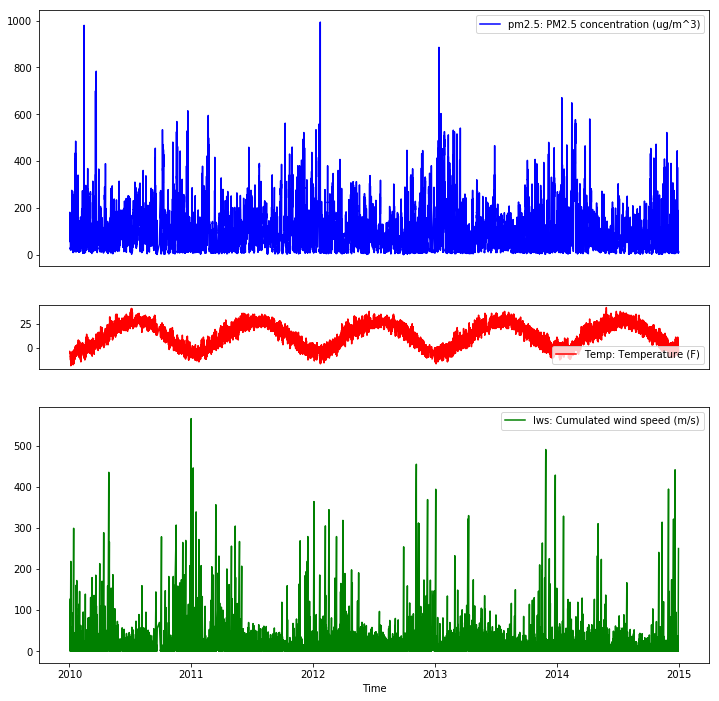

In [68]:
# plot it
f, (a0, a1, a2) = plt.subplots(3,1, gridspec_kw = {'height_ratios':[4, 1,4]}, figsize=(12, 12))
a0.plot(dataset_h.iloc[:,0], 'b')
a0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a0.legend(['pm2.5: PM2.5 concentration (ug/m^3)'])

a1.plot(dataset_h.iloc[:,2], 'r')
a1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a1.legend(['Temp: Temperature (F)'])

a2.plot(dataset_h.iloc[:,4], 'g')
a2.legend(['lws: Cumulated wind speed (m/s)'])
a2.set_xlabel('Time');
plt.savefig(r'C:\Users\Javad\Dropbox\McGill ECON MA and PhD\2018\9- Fall 2018\1- ECON 706- Machine Learning\Project\Pics\pm25_sim')

In [88]:
# Summary stat
Sum_St = []
for i in range(dataset_h.shape[1]):
    avg = float("%0.2f"%np.mean(dataset_h.iloc[:, i]))
    std = float("%0.2f"%np.std(dataset_h.iloc[:, i]))
    AC1 = float("%0.2f"%pd.Series.autocorr(dataset_h.iloc[:, i]))
    AC2 = float("%0.2f"%pd.Series.autocorr(dataset_h.iloc[:, i], lag=2))
    Sum_St.append(dataset_h.columns[i] + ' & ' + str(avg) + ' & ' + str(std) + ' & ' + str(AC1) + ' & ' + str(AC2))
Var = []
for i in range(dataset_h.shape[1]-3):
    row = []
    for j in range(dataset_h.shape[1]-3):
        x = dataset_h.iloc[:, i]
        y = dataset_h.iloc[:, j]
        np.corrcoef(x,y)
        row.append(np.corrcoef(x,y)[0,1])
    Var.append(row)
#Sum_St
Var

[[1.0,
  0.17142327190847875,
  -0.09053400243276054,
  -0.04728230808762478,
  -0.2477844491650837],
 [0.17142327190847922,
  1.0,
  0.8238212330829862,
  -0.7777221206443967,
  -0.2931059208704995],
 [-0.09053400243275968,
  0.823821233082976,
  0.9999999999999918,
  -0.826902814615898,
  -0.14961251918557722],
 [-0.04728230808762445,
  -0.7777221206443893,
  -0.8269028146159002,
  0.9999999999999944,
  0.1788714921672094],
 [-0.2477844491650858,
  -0.2931059208705012,
  -0.14961251918557994,
  0.17887149216721218,
  1.0]]